# <center> Проверка гипотез по увеличению выручки в интернет-магазине 
<center> Автор материала: Толстошеева Татьяна (@tsheeva)

Аналитик и отдел маркетинга крупного интернет-магазина подготовили список гипотез для увеличения выручки. Необходимо:
- приоритизировать гипотезы;
- запустить A/B-тест;
- проанализировать результаты

В первой части проекта 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Задача - применить фреймворки ICE и RICE для приоритизации гипотез. 

Во второй - анализ и принятие решения по результатам проведенного A/B-теста. 

## Приоритизация гипотез

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px


pd.set_option('display.max_colwidth', None) 

In [3]:
# Откроем файл и изучим гипотезы по увеличению выручки интернет-магазина 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Описание данных

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']) / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении фреймворка ICE самыми важными оказались:
- Запустить акцию, дающую скидку на товар в день рождения (16.20 баллов)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.33 баллов)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.20 баллов)

При применении фреймворка RICE приоритеты изменились, теперь в первую очередь следует проверить следующие гипотезы: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112.0 баллов)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56.0 баллов)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (40.0 баллов)
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (40.0 баллов)

Причина смены приоритетов кроется в самом методе RICE: он включает в себя ещё и оценку охвата, т.е. реагирует и на целевую аудиторию проекта.

## Анализ A/B-теста

In [6]:
# откроем и изучим датасеты
orders = pd.read_csv('/datasets/orders.csv')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# проверим на дубликаты и пропуски
print("Кол-во дубликатов в orders =",orders.duplicated().sum())
print("Кол-во дубликатов в visitors =",visitors.duplicated().sum())

print(orders.info())
print(visitors.info())

Кол-во дубликатов в orders = 0
Кол-во дубликатов в visitors = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ 

### Описание данных
Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Проведем дополнительные исследования:

In [8]:
# узнаем количество групп в АВ-тесте:
print('Группы в файле orders: ', orders['group'].unique())
print('Группы в файле visitors: ', visitors['group'].unique())

Группы в файле orders:  ['B' 'A']
Группы в файле visitors:  ['A' 'B']


In [9]:
# узнаем даты начала и окончания теста:
print('Минимальная и максимальная дата в файле orders: ', orders['date'].min(), orders['date'].max())
print('Минимальная и максимальная дата в файле visitors: ', visitors['date'].min(), visitors['date'].max())

Минимальная и максимальная дата в файле orders:  2019-08-01 00:00:00 2019-08-31 00:00:00
Минимальная и максимальная дата в файле visitors:  2019-08-01 00:00:00 2019-08-31 00:00:00


In [10]:
# количество пользователей в каждой группе:
print(orders.agg({'visitorId': 'nunique'}))
print(orders.groupby('group').agg({'visitorId': 'nunique'}))

visitorId    1031
dtype: int64
       visitorId
group           
A            503
B            586


In [11]:
# посмотрим, не попадают ли какие-то пользователи в обе группы
visitorsA = orders[orders['group'] == 'A']['visitorId'].drop_duplicates()
visitorsB = orders[orders['group'] == 'B']['visitorId'].drop_duplicates()

print('пользователи, попадающие в обе группы теста: ')
for i in visitorsA:
    if i in visitorsB:
        print(i)

пользователи, попадающие в обе группы теста: 


В наших данных нет пользователей, попавших в обе группы теста.

In [12]:
# общее количество заказов:
print(orders.agg({'transactionId': 'nunique'}))

transactionId    1197
dtype: int64


#### Вывод:
- В нашем тесте 2 группы: A и В;
- Тест проходил с 1 по 31 августа 2019 года;
- В исследовании приняли участие 1031 пользователей, 503 в группе А и 586 в группе В;
- В наших данных нет пользователей, попавших в обе группы теста. 

### Предобработка данных

В нашем распоряжении имеются датафреймы orders, содержащий информацию о заказах и посетителях интернет-магазина, полученные в рамках A/B тестирования, и visitors, содержащий количество пользователей в указанную дату в указанной группе A/B-теста. Получим новый датасет, содержащий кумулятивные данные.

In [13]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [14]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


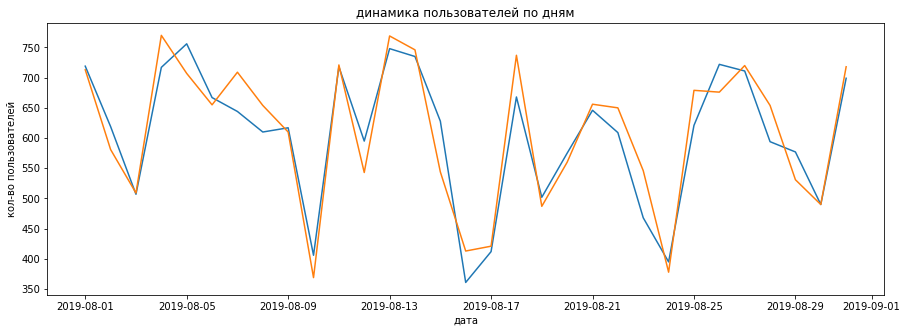

In [15]:
# посмотрим на динамику пользователей по дням:
plt.figure(figsize=(15,5))

plt.plot(visitorsADaily['date'], visitorsADaily['visitorsPerDateA'], label='A')
plt.plot(visitorsBDaily['date'], visitorsBDaily['visitorsPerDateB'], label='B')
plt.title('динамика пользователей по дням')
plt.xlabel('дата')
plt.ylabel('кол-во пользователей')
plt.show()

Динамика пользователей в обеих группах циклична и имеет общие тенденции. 

In [16]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [17]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [18]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [19]:
# проверим, корректно ли создан датафрейм:
print("Дата начала и конца теста: ", data['date'].min(), data['date'].max())
print(data.info())
print("общее количество заказов : ", data['ordersCummulativeA'].max() + data['ordersCummulativeB'].max())

Дата начала и конца теста:  2019-08-01 00:00:00 2019-08-31 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  31 non-null     datetime64[ns]
 1   ordersPerDateA        31 non-null     int64         
 2   revenuePerDateA       31 non-null     int64         
 3   ordersPerDateB        31 non-null     int64         
 4   revenuePerDateB       31 non-null     int64         
 5   ordersCummulativeA    31 non-null     int64         
 6   revenueCummulativeA   31 non-null     int64         
 7   ordersCummulativeB    31 non-null     int64         
 8   revenueCummulativeB   31 non-null     int64         
 9   visitorsPerDateA      31 non-null     int64         
 10  visitorsPerDateB      31 non-null     int64         
 11  visitorsCummulativeA  31 non-null     int64         
 12  visitorsCumm

Датасет создан корректно, приступаем к анализу.

### Выручка по дням

Построим графики кумулятивной выручки по дням и группам A/B:

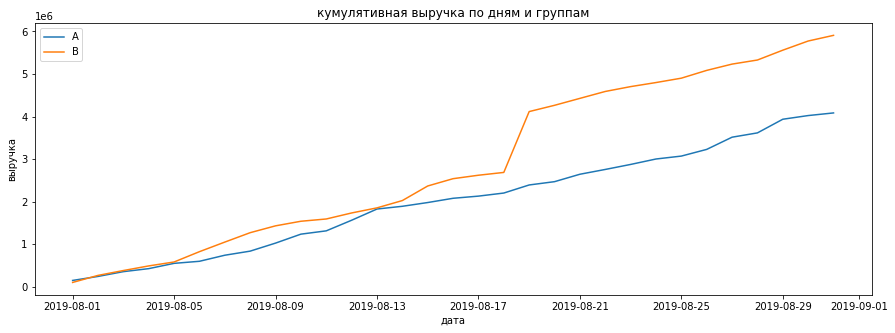

In [20]:
plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.legend()
plt.title('кумулятивная выручка по дням и группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки B группе в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Средний чек

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

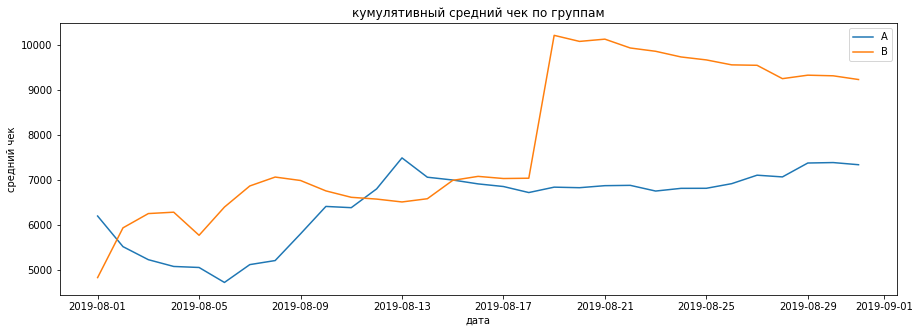

In [21]:
plt.figure(figsize=(15,5))

plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend()
plt.title('кумулятивный средний чек по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.show()

В группе А график среднего чека с начала теста начинается с падения, посередине идет резкий подъем и во второй половине теста он выравнивается. Возможно, это связано с небольшим количеством заказов в начале теста.

Для группы B средний чек растет скачкообразно и ближе к концу теста продолжает медленно и равномерно уменьшаться. Возможно, в эту группу попали крупные заказы (резкие подъемы на графике), тогда нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Относительное различие среднего чека

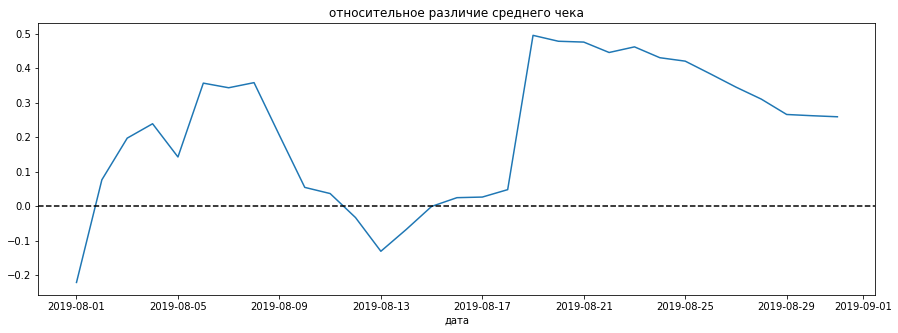

In [22]:
plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('относительное различие среднего чека')
plt.xlabel('дата')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то точно есть крупные заказы и выбросы! 

### Cреднее количество заказов на посетителя

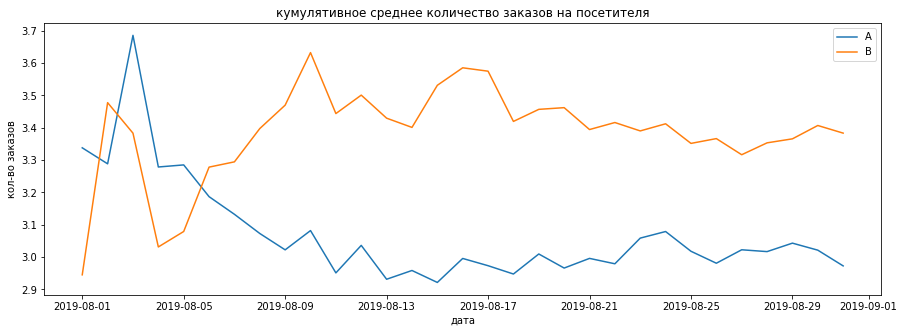

In [23]:
plt.figure(figsize=(15,5))

# строим график кумулятивного среднего количества заказов на посетителя по группам

plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA']*100, label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB']*100, label='B')

plt.legend()
plt.title('кумулятивное среднее количество заказов на посетителя')
plt.xlabel('дата')
plt.ylabel('кол-во заказов')
plt.show()

В начале теста наблюдаются скачки в обеих группах, под конец графики расходятся и стабилизируются. Посетители группы В делают повторные заказы чаще посетителей из группы А. 

### Относительное изменение среднего кол-ва заказов

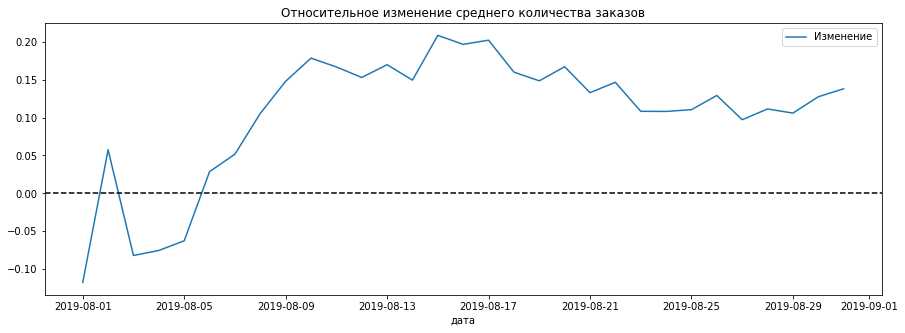

In [24]:
plt.figure(figsize=(15,5))

plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB'])/(data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1, label="Изменение")
plt.legend()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение среднего количества заказов')
plt.xlabel('дата')
plt.show()

График различия между сегментами резко «скачет» в самом начале теста. Надо искать аномалии.

###  Количество заказов на пользователя

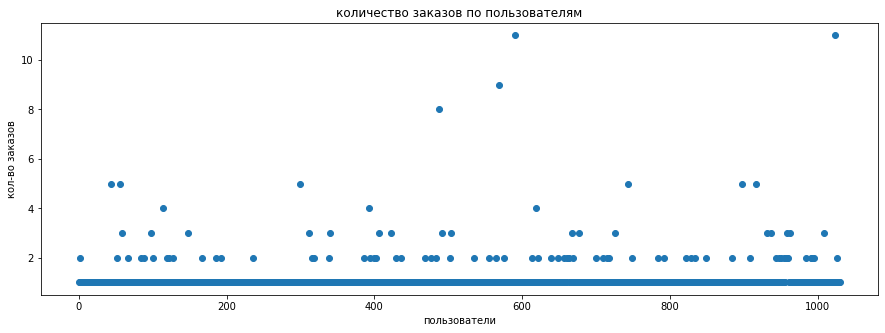

In [25]:
plt.figure(figsize=(15,5))

# построим точечную диаграмму числа заказов на одного пользователя: 

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('количество заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('кол-во заказов')
plt.show()

Большинство покупателей заказывали только один раз. Много пользователей с 2-3 заказами. Встречаются пользователи с 4-5 заказами, их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Граница для определения аномальных пользователей

In [26]:
# посчитаем выборочные перцентили количества заказов на одного пользователя:
print('Рассчитаем 90 ,95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

Рассчитаем 90 ,95 и 99 перцентили по заказам :  [1. 2. 4.]


Не более 1% пользователей оформляли больше чем 4 заказа. И 5% пользователей заказывали более 2 раз. Для большей точности рассчитаем все процентили с 95 по 99:

In [27]:
print('перцентили c 95 по 99 (по заказам) : ', np.percentile(ordersByUsers['orders'], [95,96,97,98,99])) 

перцентили c 95 по 99 (по заказам) :  [2. 2. 2. 3. 4.]


Теперь видно, что большинство (98%) пользователей делают 1 или 2 заказа. Всё что выше - это аномалия. Возьмем 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней. 

### Стоимость заказов

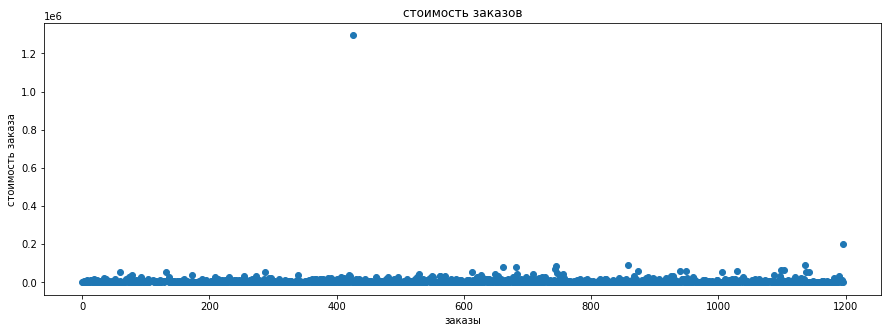

In [28]:
plt.figure(figsize=(15,5))
# Оценим стоимость заказов с помощью точечного графика:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('стоимость заказов')
plt.xlabel('заказы')
plt.ylabel('стоимость заказа')
plt.show()

Есть несколько анамально дорогих заказов. По графику сложно выбрать границу аномальных значений. Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 195000:

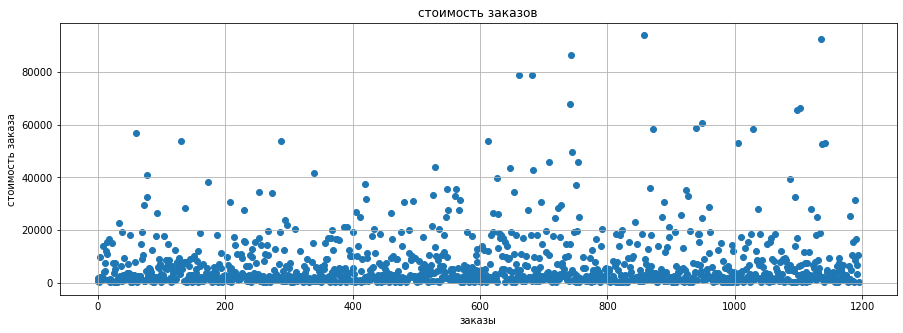

In [29]:
orders_filtered = orders[orders['revenue']<=195000]

plt.figure(figsize=(15,5))
# Оценим стоимость заказов с помощью точечного графика:
x_values = pd.Series(range(0,len(orders_filtered['revenue'])))
plt.scatter(x_values, orders_filtered['revenue'])
plt.title('стоимость заказов')
plt.xlabel('заказы')
plt.ylabel('стоимость заказа')
plt.grid()
plt.show()

Большинство заказов по стоимости не привышают 20000. Заказы стоимостью более 60000 кажутся аномалией. Чтобы найти более точную границу аномальных заказов рассчитаем процентили.

### Граница для определения аномальных заказов

In [30]:
# определим 90, 95 и 99 перцентили среднего чека в выборке:
print('Рассчитаем 90, 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [90, 95, 99])) 

Рассчитаем 90, 95 и 99 перцентили по выручке заказов :  [18168.  28000.  58233.2]


Не более 10% заказов дороже 18 168 рублей и не более 5% заказов дороже 28 000 рублей. 99% заказов меньше суммы 58233.2 , установим её в качестве границы для аномалий.

### Cтатистическая значимость различий в среднем количестве заказов по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть.

In [31]:
# посчитаем статистическую значимость различия в среднем количестве заказов между группами

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [32]:
# подготовим выборки к проверке критерием Манна-Уитни

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
# выведем относительный прирост среднего числа заказов группы B:

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


P-value = 0.017, это меньше уровня значимости. Этозначит, что по «сырым» данным различия в среднем числе заказов групп A и B есть. Относительный выигрыш группы B равен 13.8%.

### Cтатистическая значимость различий в среднем чеке по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [34]:
# передадим критерию mannwhitneyu() данные о выручке с заказов 
# и найдем относительные различия в среднем чеке между группами:

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель B и A = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный показатель B и A = 0.259


P-value = 0,729, это значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. 

То есть средние чеки по "сырым" данным схожи. Впрочем, средний чек группы B значительно выше среднего чека группы A - почти на 26%! Наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Cтатистическая значимость различий в среднем количестве заказов по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 58233.2 рублей. 
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов по "очищенным данным" между группами нет. Альтернативная: различия в среднем в среднем количестве заказов по "очищенным данным" между группами есть.

In [35]:
# Сделаем срезы пользователей с числом заказов 3 и более — usersWithManyOrders и пользователей, 
# совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers
abnormal_orders = 3
abnormal_revenue = 58233.2

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= abnormal_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= abnormal_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >= abnormal_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
31


Всего 31 аномальный пользователь. Узнаем, как их действия повлияли на результаты теста.

In [36]:
# создадим датафрейм с кумулятивными значениями по очищенным данным: 

ordersFiltered = orders[
            np.logical_not(orders['visitorId'].isin(abnormalUsers))
        ]

ordersADailyFiltered = (
    ordersFiltered[ordersFiltered['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADailyFiltered.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulativeFiltered = ordersADailyFiltered.apply(
    lambda x: ordersADailyFiltered[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulativeFiltered.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


ordersBDailyFiltered = (
    ordersFiltered[ordersFiltered['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDailyFiltered.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulativeFiltered = ordersBDailyFiltered.apply(
    lambda x: ordersBDailyFiltered[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulativeFiltered.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
dataFiltered = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulativeFiltered, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulativeFiltered, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста:

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель B и A: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.010
Относительный показатель B и A: 0.174


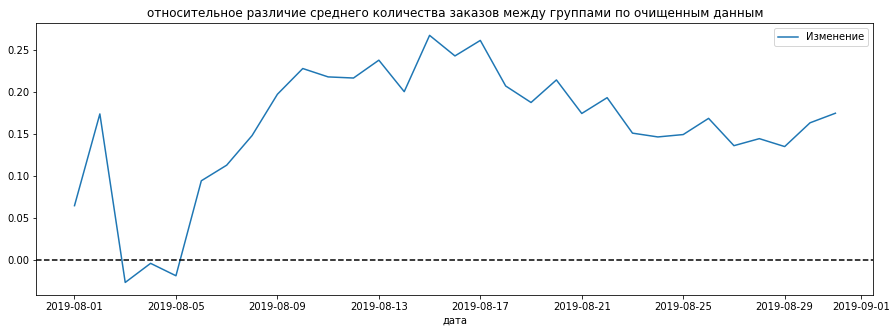

In [39]:
plt.figure(figsize=(15,5))

# построим график различия среднего количества заказов между группами по очищенным данным:

plt.plot(dataFiltered['date'], (dataFiltered['ordersCummulativeB'] / dataFiltered['visitorsCummulativeB'])/(dataFiltered['ordersCummulativeA'] / dataFiltered['visitorsCummulativeA']) - 1, label="Изменение")
plt.legend()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('относительное различие среднего количества заказов между группами по очищенным данным')
plt.xlabel('дата')
plt.show()

#### Вывод

- P-value по "очищенным" данным 0.01, это еще меньше, чем по "сырым" (там P-value = 0.017), и так же меньше уровня значимости 0.05. Это значит, что мы отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет.
- Относительный выигрыш группы B в среднем количестве заказов по "очищенным" данным равен 17,3% (по сырым данным - 13,8%). Пользователи из этой группы чаще делают повторные заказы. 
- Графики различия среднего количества заказов между группами и по "сырым" и по "очищенным данным" почти не отличаются друг от друга, результаты по среднему количеству заказов практически не изменились. 

Произошло ли что-нибудь с результатами по среднему чеку?

### Cтатистическая значимость различий в среднем чеке заказа по «очищенным» данным

 Нулевая гипотеза: различий в среднем чеке по "очищенным данным" между группами нет. Альтернативная гипотеза: различия в среднем чеке по "очищенным данным" между группами есть.

In [40]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:

print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель B и A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.798
Относительный показатель B и A: -0.020


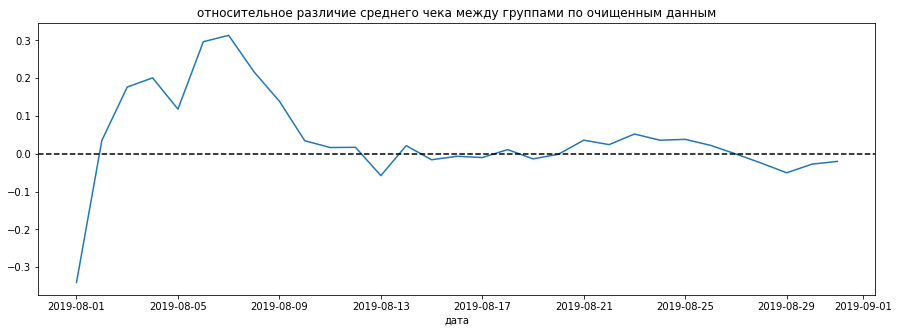

In [41]:
plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(dataFiltered['date'], (dataFiltered['revenueCummulativeB']/dataFiltered['ordersCummulativeB'])/(dataFiltered['revenueCummulativeA']/dataFiltered['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное различие среднего чека между группами по очищенным данным')
plt.xlabel('дата')
plt.show()

#### Вывод

- P-value по "очищенным" данным = 0,798 (по "сырым" = 0,729). Мы все так же не можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказов между группами нет.
- А вот средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж 26%. Это значит то, что нам удалось избавиться от аномальных значений

## Результаты

### Приоритизация гипотез.  

В первой части проекта мы получили 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Используя фреймворки ICE и RICE для приоритизации гипотез, мы выделили задачи, которые надо решить в первую очередь, а какие можно решить потом.

При применении фреймворка ICE самыми важными оказались:
- Запустить акцию, дающую скидку на товар в день рождения (16.20 баллов)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.33 баллов)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.20 баллов)

При применении фреймворка RICE приоритеты изменились, теперь в первую очередь следует проверить следующие гипотезы: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112.0 баллов)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56.0 баллов)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (40.0 баллов)
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (40.0 баллов)

### Анализ А/B теста

Работали с датафреймами orders, содержащий информацию о заказах и посетителях интернет-магазина, полученные в рамках A/B тестирования, и visitors, содержащий количество пользователей в указанную дату в указанной группе A/B-теста. 

Проверили их на пропуски и дубликаты, выяснили, что в тесте 2 группы: A и В, он проходил с 1 по 31 августа 2019 года и в нем приняли участие 1031 пользователей, 503 в группе А и 586 в группе В. 

После предобработки данных мы создали новый датасет, содержащий кумулятивные данные, и уже с его помощью изучили выручку по дням, средний чек, количество и стоимость заказов. Увидели аномалии и убрали из выборки пользователей, совершивших от 3 заказов или заказы дороже 58233.2 рублей.

И по "сырым" и по "очищенным" данным различия в количестве заказов по группам есть. Относительный выигрыш группы B в среднем количестве заказов по "очищенным" данным = 17,3% (по сырым данным = 13,8%), то есть пользователи из этой группы чаще делают повторные заказы.

По "сырым" и по "очищенным" данным различия в средних чеках по группам отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж 26%. 

В группе B больше заказов, чем в группе A, хотя по среднему чеку группы примерно равны. Зафиксируем победу группы B и остановим тест. 